In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\\Swati\\Data Science\\Machine Learning\\Dataset for Machine Learning\\DuplicatePairs.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 6)

In [5]:
new_df=df.sample(50000,random_state = 2)

In [6]:
new_df.shape

(50000, 6)

In [7]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [8]:
def preprocess(q):
    q = str(q).lower().strip()
    
    #Replace certain special characters with their string equivalents
    q = q.replace('%','percent')
    q = q.replace('$','dollar')
    q = q.replace('@','at')
    
    #The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]','')
    
    # Replacing some numbers with string equivalents (not perfect,can be done better to account for more cases)
    q = q.replace(',000,000,000','b ')
    q = q.replace(',000,000 ','m ')
    q = q.replace(',000 ','k ')
    q = re.sub(r'([0-9]+)000000000',r'\1b',q)
    q = re.sub(r'([0-9]+)000000',r'\1m',q)
    q = re.sub(r'([0-9]+)000',r'\1k',q)
    
    #Decontarcting words
    contractions = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }
    q_decontracted = []
        
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_decontracted.append(word)
        
    q = ' '.join(q_decontracted)
    q = q.replace("'ve"," have")
    q = q.replace("n't"," not")
    q = q.replace("'re"," are")
    q = q.replace("'ll"," will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove Punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern,' ',q).strip()
    
    return q
    
    

In [9]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [10]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [11]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [12]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [13]:
    new_df.duplicated().sum()

0

0    31601
1    18399
Name: is_duplicate, dtype: int64
0    63.202
1    36.798
Name: is_duplicate, dtype: float64


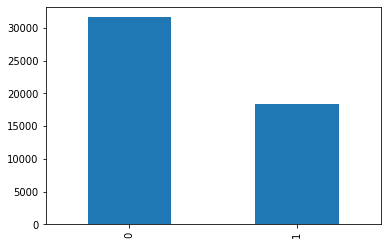

In [14]:
##Distribution of duplicate and non duplicate questions
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [15]:
##Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of Unique Questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of Questions getting repeated',x[x].shape[0])

Number of Unique Questions 88945
Number of Questions getting repeated 7384


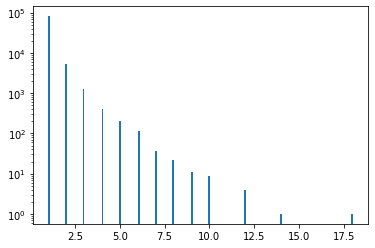

In [16]:
## Repeated question histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [17]:
## Feature Engineering
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()


In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49


In [19]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9


In [20]:
##Advanced feature engineering
from nltk.corpus import stopwords

def test_fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = .0001
    
    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    ##Converting the sentence into Tokens.
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    ##Get the non-stopwords in the questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    ##Get the stopwords in questions
    q1_stops = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_stops = set([word for word in q1_tokens if word not in STOP_WORDS])
    
    ##Get the common non-stopwords from question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    ##Get the common stopwords from question pair
    common_stop_count = len(q1_stops.intersection(q2_words))
    
     ##Get the common token from question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens))) 
    
    token_features[0] = common_word_count/(min(len(q1_words),len(q2_words)) + SAFE_DIV) 
    token_features[1] = common_word_count/(max(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count/(min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count/(max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count/(min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count/(max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    
    ##Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    ##First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [22]:
token_features = new_df.apply(test_fetch_token_features, axis = 1)

new_df["cwc_min"]        = list(map(lambda x: x[0],token_features))
new_df["cwc_max"]        = list(map(lambda x: x[1],token_features))
new_df["csc_min"]        = list(map(lambda x: x[2],token_features))
new_df["csc_max"]        = list(map(lambda x: x[3],token_features))
new_df["ctc_min"]        = list(map(lambda x: x[4],token_features))
new_df["ctc_max"]        = list(map(lambda x: x[5],token_features))
new_df["last_word_eq"]   = list(map(lambda x: x[6],token_features))
new_df["first_word_eq"]  = list(map(lambda x: x[7],token_features))


In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,0.874989,0.874989,0.874989,0.874989,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,0.666644,0.499988,0.666644,0.666644,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,0.000000,0.000000,0.000000,0.000000,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,0.749981,0.599988,0.749981,0.749981,0.599988,0.333330,1.0,0.0


In [24]:
import distance

def test_fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    ##Converting the sentence into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    ##Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    ## Average Token length of both questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1,q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) +1)
            
    return length_features

In [25]:
length_features = new_df.apply(test_fetch_length_features, axis=1)
new_df['abs_len_diff'] = list(map(lambda x: x[0],length_features))
new_df['mean_len'] = list(map(lambda x: x[1],length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [26]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.874989,0.874989,0.874989,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.499988,0.666644,0.666644,0.583328,0.466664,1.0,1.0,3.0,13.5,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0.000000,0.000000,0.000000,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.050847
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.599988,0.749981,0.749981,0.599988,0.333330,1.0,0.0,4.0,7.0,0.542857


In [27]:
##Fuzzywuzzy Features
from fuzzywuzzy import fuzz

def test_fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    ##fuzz ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    
    ##fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)
    
    ##token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)
    
    ##token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)
    
    return fuzzy_features

In [28]:
fuzzy_featues = new_df.apply(test_fetch_fuzzy_features,axis=1)

##Creating new features column for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0],fuzzy_featues))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1],fuzzy_featues))
new_df['token_sort_ratio'] = list(map(lambda x: x[2],fuzzy_featues))
new_df['token_set_ratio'] = list(map(lambda x: x[3],fuzzy_featues))

In [29]:
print(new_df.shape)
new_df.head()

(50000, 25)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,0.000000,0.0,0.0,17.0,21.5,0.050847,29,41,23,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,1.0,0.0,4.0,7.0,0.542857,55,70,48,69


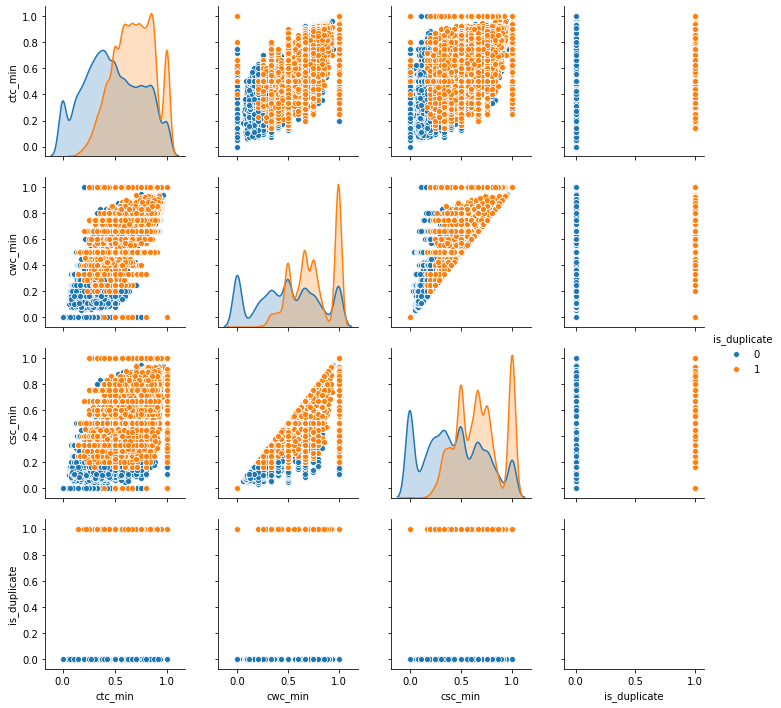

In [30]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue = 'is_duplicate')

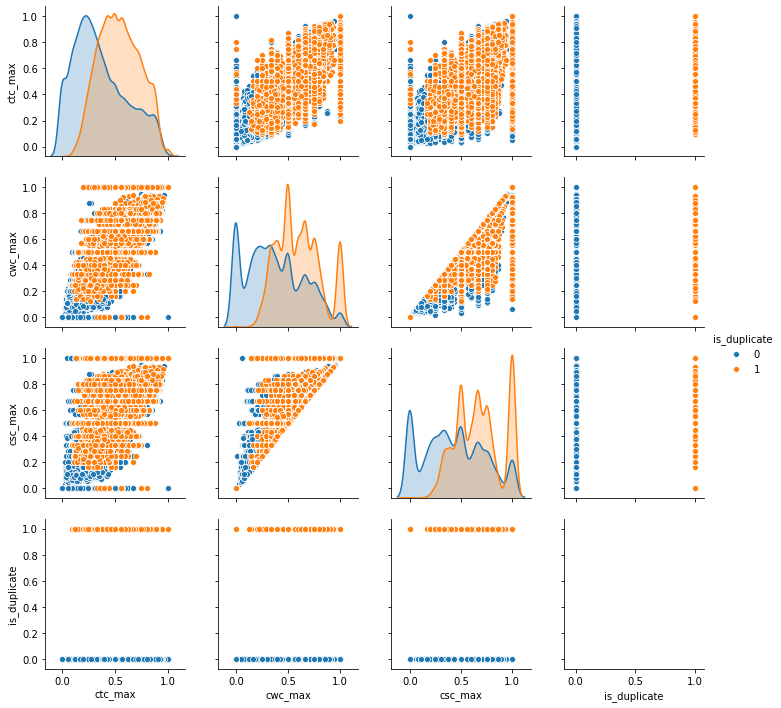

In [31]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue = 'is_duplicate')

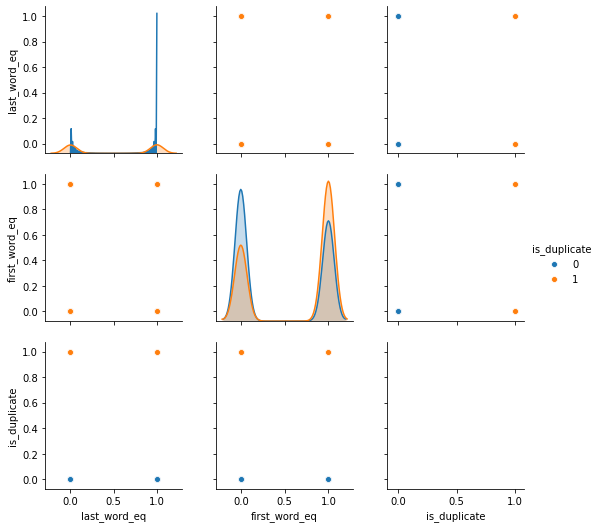

In [32]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue = 'is_duplicate')

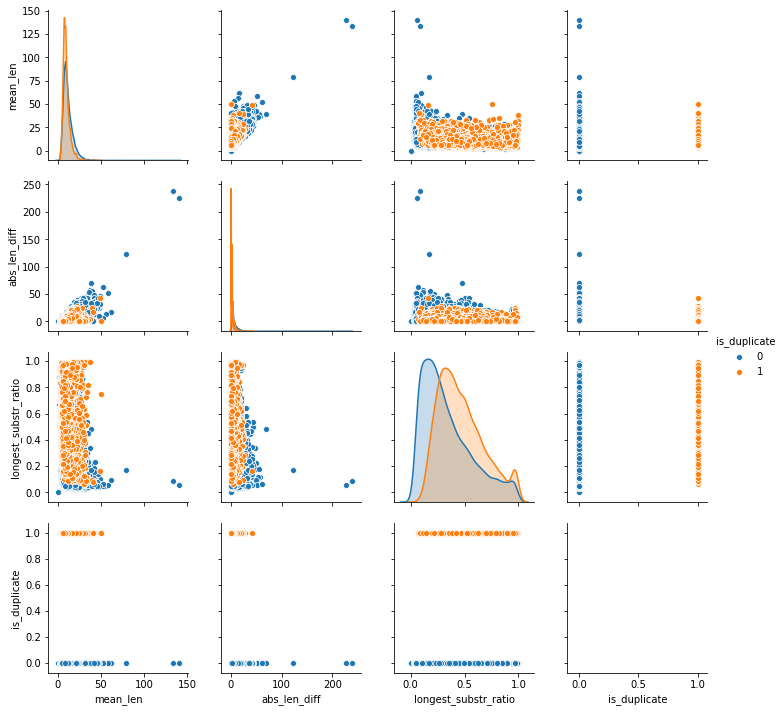

In [33]:
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue = 'is_duplicate')

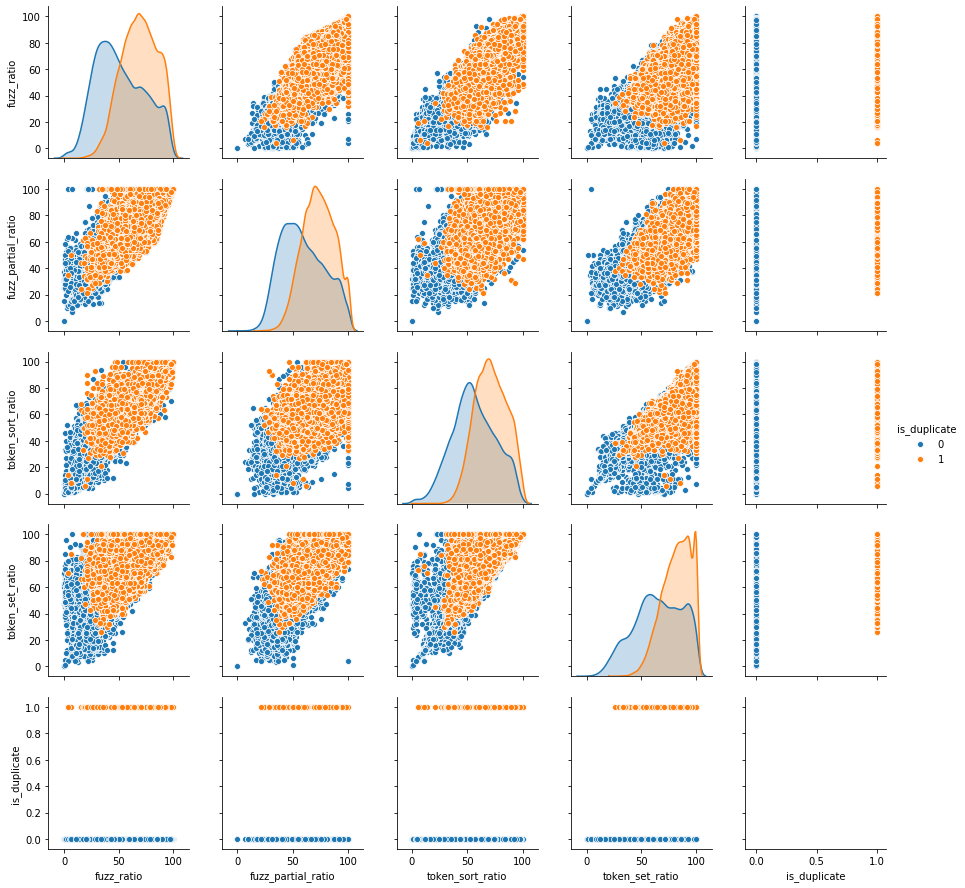

In [34]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue = 'is_duplicate')

minimum characters 1
maximum characters 396
average num of characters 58


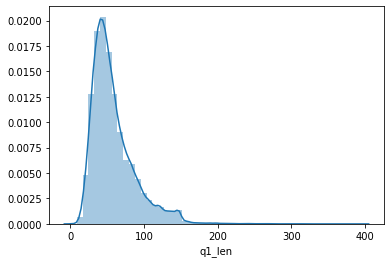

In [36]:
##Analysis of features
sns.distplot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 0
maximum characters 1187
average num of characters 59


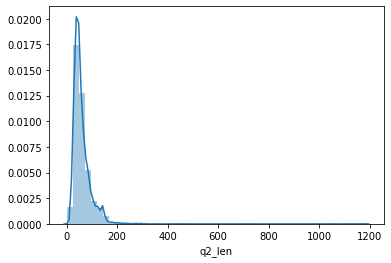

In [37]:
sns.distplot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum characters 1
maximum characters 82
average num of characters 11


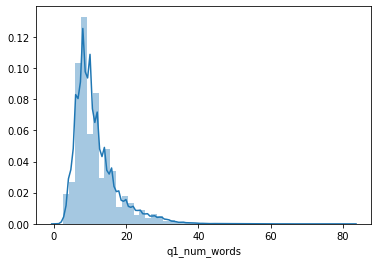

In [38]:
sns.distplot(new_df['q1_num_words'])
print('minimum characters',new_df['q1_num_words'].min())
print('maximum characters',new_df['q1_num_words'].max())
print('average num of characters',int(new_df['q1_num_words'].mean()))

minimum characters 1
maximum characters 281
average num of characters 11


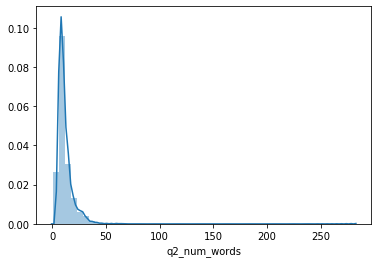

In [39]:
sns.distplot(new_df['q2_num_words'])
print('minimum characters',new_df['q2_num_words'].min())
print('maximum characters',new_df['q2_num_words'].max())
print('average num of characters',int(new_df['q2_num_words'].mean()))

In [40]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
327711,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
151235,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [41]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 20)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,75,76,13,13,0.874989,0.874989,0.874989,0.874989,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,0,48,56,13,16,0.666644,0.499988,0.666644,0.666644,0.583328,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,0,104,119,28,21,0.000000,0.000000,0.000000,0.000000,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,0,58,145,14,32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.050847,29,41,23,30
151235,0,34,49,5,9,0.749981,0.599988,0.749981,0.749981,0.599988,0.333330,1.0,0.0,4.0,7.0,0.542857,55,70,48,69


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
##merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [43]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2], axis = 1)
temp_df.shape

(50000, 6000)

In [44]:
final_df = pd.concat([final_df,temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6020)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,75,76,13,13,0.874989,0.874989,0.874989,0.874989,0.923070,...,0,0,0,0,0,0,0,0,0,0
115086,0,48,56,13,16,0.666644,0.499988,0.666644,0.666644,0.583328,...,0,0,0,0,0,0,0,0,0,0
327711,0,104,119,28,21,0.000000,0.000000,0.000000,0.000000,0.149999,...,0,0,0,0,0,0,0,0,0,0
367788,0,58,145,14,32,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
151235,0,34,49,5,9,0.749981,0.599988,0.749981,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [45]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=.2,random_state=1234)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9996

In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

[08:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9996

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
##For random forest model
confusion_matrix(y_test,y_pred)

array([[9995,    0],
       [   4,    1]], dtype=int64)

In [54]:
## for xgboost model
confusion_matrix(y_test,y_pred)

array([[9995,    0],
       [   4,    1]], dtype=int64)

In [35]:
x = "consequences of bhopal gas tragedy	"
y = "i am from india and live abroad i met a guy f..."
result = int(bool(set(x.split()).intersection(set(y.split()))))

In [36]:
result 

0